In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

In [2]:
data = dp.getXYdata_wXYerr('data/NGC5533-rot-data_fmt.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

In [28]:
def f(r,M,rc,rho00,c,pref):
#def f(r,M,rc,rho00,c):
    return np.sqrt(nf.bh_v(r,M,load=True)**2 + nf.h_v(r,rc,rho00,load=True)**2 + c*nf.b_v(r,load=True)**2 + nf.d_v(r,pref,load=True)**2)
    #To remove loading errors, I set the prefactor in the function to 1 and put a prefactor in the front that will behave the same way.

#Cache/memoize
# - number of iterations -> number of function calls
# - 40 calls was reasonable

In [29]:
#Setup
weighdata = 1/v_err1
l_mod = lm.Model(f)
params = l_mod.make_params()
#Black Hole
params.add('M', value=nf.Mbh_def, min=0) #Mass
#Bulge
params.add('c', value=1, min=0)          #Contributions should all add
#Disk 
params.add('pref', value=0.5, min=0)
#Halo
params.add('rc', value=nf.h_rc, min=0)   #Radius (magnitude)
params.add('rho00', value=nf.rho00_c, min=0) #Density (halo)

#Do fit
l_fit = l_mod.fit(v_dat,params,r=r_dat,weights=weighdata)

Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Saved.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Saved.
Already exists! Loading data.
Already exists! Loading data.
Saved.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Already exists! Loading data.
Already exists! Loading data.
Already exists! Loading data.
Saved.
Already exists! Loading data.
Already exists! Loading data.
Saved.
Already exists! Loading data.
Already exists! 

In [30]:
#Define Stuff
l_dict = l_fit.best_values
l_M = l_dict['M']
l_rc = l_dict['rc']
l_rho00 = l_dict['rho00']
l_pref = l_dict['pref']
l_c = l_dict['c']

l_curve = np.sqrt(nf.bh_v(r_dat,l_M,load=True)**2 + nf.h_v(r_dat,l_rc,l_rho00,load=True)**2 + l_c*nf.b_v(r_dat,load=True)**2 + nf.d_v(r_dat,pref=l_pref,load=True)**2)[1]

b_curve = l_c*nf.b_v(r_dat,load=True)
d_curve = nf.d_v(r_dat,pref=l_pref,load=True) #Disk only
nodisk = np.sqrt(nf.bh_v(r_dat,l_M,load=True)**2 + nf.h_v(r_dat,l_rc,l_rho00,load=True)**2 + l_c*nf.b_v(r_dat,load=True)**2)

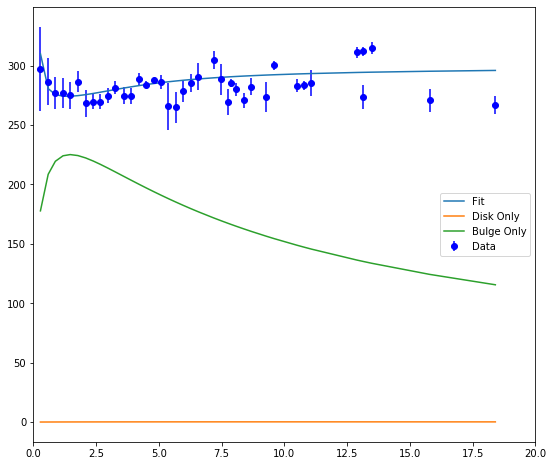

In [32]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,20)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,l_curve,label='Fit')
plt.plot(r_dat,d_curve,label='Disk Only')
#plt.plot(r_dat,nodisk,label='No Disk')
plt.plot(r_dat,b_curve,label='Bulge Only')

plt.legend()
plt.show()

l_fit

In [18]:
l_curve

array([267.21510639, 282.30849897, 299.62334592, 315.47887646,
       327.88921897, 339.33685843, 349.44318577, 358.15730294,
       365.27721717, 372.11270048, 377.72790331, 383.99161096,
       388.05560323, 392.63224284, 396.28581142, 399.50950366,
       402.47449974, 404.8130332 , 407.00713802, 408.9546941 ,
       410.61292955, 411.94628355, 413.93516899, 414.61293056,
       415.03001228, 415.15525922, 415.30843962, 415.38500458,
       415.29067504, 414.62324171, 414.06978871, 411.60695907,
       410.58035084, 409.5018944 , 400.71514444, 399.32534858,
       399.23200305, 397.27976352, 381.99673931, 362.29719682])